In [1]:
#Introduction: Python Project3 - NYPD Open Source Data

In [2]:
#Goal/Business Question: Using data presented, is their a correlation between arrest and borough based on race or age?

In [3]:
#First - import libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
#Import Data

In [7]:
df = pd.read_csv("https://data.cityofnewyork.us/api/views/uip8-fykc/rows.csv?accessType=DOWNLOAD")

In [8]:
#Quick Glance in what data looks like

In [9]:
df.head(20)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,263187871,02/07/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,0,25-44,M,BLACK,951637,171141,40.636362,-74.117505,POINT (-74.117505 40.636362)
1,261368273,01/04/2023,NaN,(null),NaN,(null),RPA0076801,M,M,34,0,25-44,F,BLACK,1004287,251338,40.856519,-73.927564,POINT (-73.927564 40.856519)
2,261667175,01/10/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,42,0,18-24,F,WHITE HISPANIC,1008754,238895,40.822355,-73.911463,POINT (-73.911463 40.822355)
3,264298625,02/27/2023,NaN,(null),NaN,(null),PL 2224000,F,Q,113,0,25-44,M,BLACK,1039225,181937,40.665881,-73.801837,POINT (-73.80183654 40.66588105)
4,261516485,01/07/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,18,0,<18,M,BLACK,988210,218129,40.765390,-73.985702,POINT (-73.985702 40.76539)
5,261273897,01/03/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,13,0,25-44,F,BLACK,989179,205835,40.731646,-73.982214,POINT (-73.982214 40.731646)
6,261487453,01/06/2023,244.0,"BURGLARY,UNCLASSIFIED,UNKNOWN",107.0,BURGLARY,PL 1402000,F,Q,103,0,45-64,F,BLACK,1042249,193186,40.696739,-73.790838,POINT (-73.790838 40.696739)
7,262291240,01/21/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,75,0,25-44,M,BLACK,1016237,180818,40.662924,-73.884702,POINT (-73.884702 40.662924)
8,261927480,01/14/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,K,67,0,25-44,M,BLACK,1006227,178986,40.657926,-73.920790,POINT (-73.92079 40.657926)
9,261823038,01/12/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,66,0,45-64,M,WHITE,984981,174446,40.645493,-73.997366,POINT (-73.997366 40.645493)


In [10]:
#Get description of Dataset

In [11]:
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,5.457600e+04,54325.000000,54325.000000,54576.000000,54576.000000,5.457600e+04,54576.000000,54576.000000,54576.000000
mean,2.635819e+08,430.457174,251.346618,63.581849,0.967147,1.005843e+06,208315.449337,40.737667,-73.920633
std,1.401601e+06,277.973670,149.381441,34.536247,7.865097,2.176083e+04,29773.620121,0.192568,0.325643
min,2.611809e+08,12.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.251844
25%,2.623376e+08,115.000000,113.000000,40.000000,0.000000,9.916260e+05,186030.250000,40.677230,-73.973423
50%,2.635892e+08,397.000000,236.000000,63.000000,0.000000,1.005731e+06,206632.500000,40.733736,-73.922475
75%,2.647476e+08,705.000000,344.000000,101.000000,0.000000,1.017750e+06,236537.000000,40.815904,-73.879103
max,2.660041e+08,972.000000,995.000000,123.000000,97.000000,1.066940e+06,271819.000000,40.912714,0.000000


In [12]:
#Check dataframe Column types

In [13]:
df.dtypes

ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                       float64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
dtype: object

In [14]:
#Drop n/a values

In [15]:
df1 = df.dropna(how='any',axis=0)

In [16]:
#Checking how many unique values are in each column

In [17]:
df1.nunique()

ARREST_KEY                  53905
ARREST_DATE                    90
PD_CD                         211
PD_DESC                       202
KY_CD                          63
OFNS_DESC                      59
LAW_CODE                      727
LAW_CAT_CD                      5
ARREST_BORO                     5
ARREST_PRECINCT                77
JURISDICTION_CODE              18
AGE_GROUP                       5
PERP_SEX                        3
PERP_RACE                       7
X_COORD_CD                  14700
Y_COORD_CD                  15112
Latitude                    16192
Longitude                   16204
New Georeferenced Column    16408
dtype: int64

In [18]:
df1.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,5.390500e+04,53905.000000,53905.000000,53905.000000,53905.000000,5.390500e+04,53905.000000,53905.000000,53905.000000
mean,2.635811e+08,433.460625,245.552453,63.656284,0.951971,1.005780e+06,208297.854151,40.737610,-73.920842
std,1.402096e+06,276.954369,134.707762,34.405814,7.790696,2.172484e+04,29848.560060,0.193635,0.327517
min,2.611809e+08,100.000000,101.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,-74.251844
25%,2.623301e+08,129.000000,113.000000,40.000000,0.000000,9.916610e+05,185761.000000,40.676400,-73.973274
50%,2.635892e+08,397.000000,236.000000,63.000000,0.000000,1.005691e+06,206647.000000,40.733876,-73.922499
75%,2.647556e+08,705.000000,344.000000,100.000000,0.000000,1.017426e+06,236537.000000,40.815904,-73.880110
max,2.660041e+08,972.000000,881.000000,123.000000,97.000000,1.066940e+06,271819.000000,40.912714,0.000000


In [19]:
#checking for any any null value

In [20]:
df1.isnull().sum()

ARREST_KEY                  0
ARREST_DATE                 0
PD_CD                       0
PD_DESC                     0
KY_CD                       0
OFNS_DESC                   0
LAW_CODE                    0
LAW_CAT_CD                  0
ARREST_BORO                 0
ARREST_PRECINCT             0
JURISDICTION_CODE           0
AGE_GROUP                   0
PERP_SEX                    0
PERP_RACE                   0
X_COORD_CD                  0
Y_COORD_CD                  0
Latitude                    0
Longitude                   0
New Georeferenced Column    0
dtype: int64

In [21]:
#Compare Race to Precinct to see if one race is more likely to be arrested in a particular precinct

[Text(0, 0, 'BLACK'),
 Text(1, 0, 'WHITE HISPANIC'),
 Text(2, 0, 'WHITE'),
 Text(3, 0, 'UNKNOWN'),
 Text(4, 0, 'BLACK HISPANIC'),
 Text(5, 0, 'ASIAN / PACIFIC ISLANDER'),
 Text(6, 0, 'AMERICAN INDIAN/ALASKAN NATIVE')]

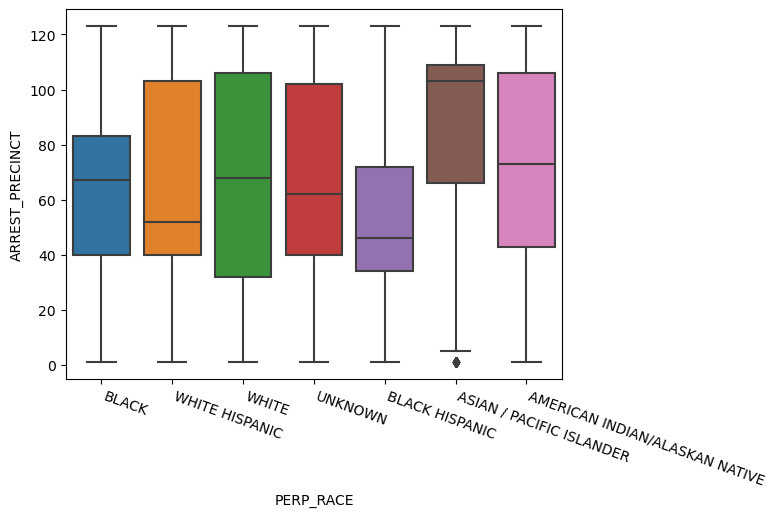

<Figure size 3000x1000 with 0 Axes>

In [22]:
chart = sns.boxplot(y=df1['ARREST_PRECINCT'], x=df1['PERP_RACE'])
plt.figure(figsize=(30, 10))
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation= -20, 
    horizontalalignment='left')

In [ ]:
#Compare count of arrests by Borough with break-dow by race

<AxesSubplot:xlabel='ARREST_BORO', ylabel='count'>

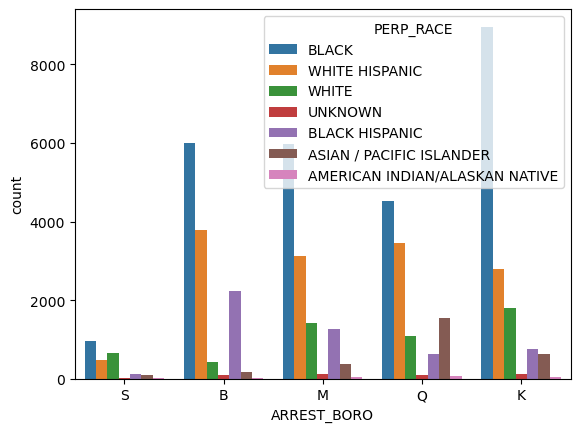

In [23]:
sns.countplot(x='ARREST_BORO', hue='PERP_RACE', data=df1)

In [24]:
#Compare age group to arresting borough

<AxesSubplot:xlabel='ARREST_BORO', ylabel='count'>

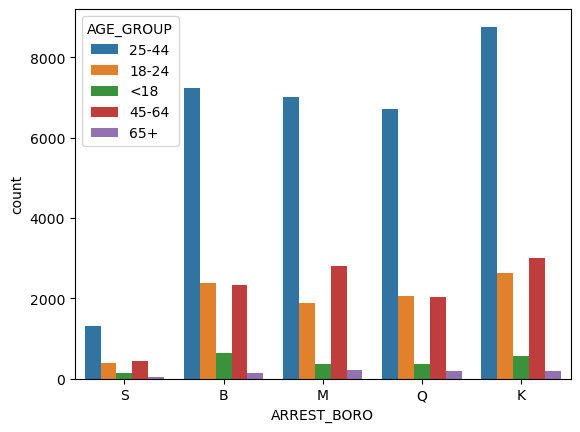

In [25]:
sns.countplot(x='ARREST_BORO', hue='AGE_GROUP', data=df1)

In [26]:
#Findings 

In [28]:
#1: Asian Pacific Islanders are most like to be areested near precinct 100.

In [ ]:
#2: Blacks are more likely to be arrested in every borough

In [ ]:
#3: pleople aged 25-44 are most likely to be arrested